## Input Files

In [1]:
import os

In [ ]:
import pandas as pd

df_S1S2 = pd.read_csv(file_path)
df_S1S2.head()  # Display first few rows

,ID,Auscultation Point,True S1S2,UNET S1S2_start,S1S2_start error,UNET S1S2_end,S1S2_end error,S1S2_mid error,UNET S1S2_mid,Status_of_EF
0,1,PV,343.7,344.242424,0.542424,237.647059,106.052941,3.405882,340.294118,2
1,1,TV,345.3,325.555556,19.744444,225.000000,120.300000,31.615789,313.684211,2
2,3,MV,282.5,264.000000,18.500000,188.000000,94.500000,10.833333,271.666667,1
3,4,AV,306.4,312.000000,5.600000,208.000000,98.400000,21.600000,284.800000,2
4,4,TV,298.9,334.545455,35.645455,218.181818,80.718182,14.433333,313.333333,2


## Estimated S1S2 vs True S1S2

In [ ]:
import pandas as pd

# Load dataset
df_S1S2 = pd.read_csv(file_path)

# Group by auscultation point and compute statistics for errors
error_stats = df_S1S2.groupby("Status_of_EF")[["S1S2_start error", "S1S2_end error", "S1S2_mid error"]].agg(["mean", "median", "std"])

# Display statistics
print(error_stats)

# Identify the best auscultation point based on lowest mean error
best_point = error_stats.idxmin()["S1S2_start error"]["median"]
print(f"Best EF group based on mean S1S2_start error: {best_point}")

             S1S2_start error                       S1S2_end error  \
                         mean     median        std           mean   
Status_of_EF                                                         
1                   33.445393  29.607453  16.122711      76.958083   
2                   23.893000  19.900794  18.981007     120.418193   
3                   19.743904  12.841288  22.204530     118.507483   

                                    S1S2_mid error                        
                  median        std           mean     median        std  
Status_of_EF                                                              
1              82.850000  49.194373      36.574090  32.678571  27.008668  
2             119.659091  23.638422      30.294299  20.742683  24.702121  
3             117.637561  22.884483      28.114424  23.201681  24.811128  
Best EF group based on mean S1S2_start error: 3


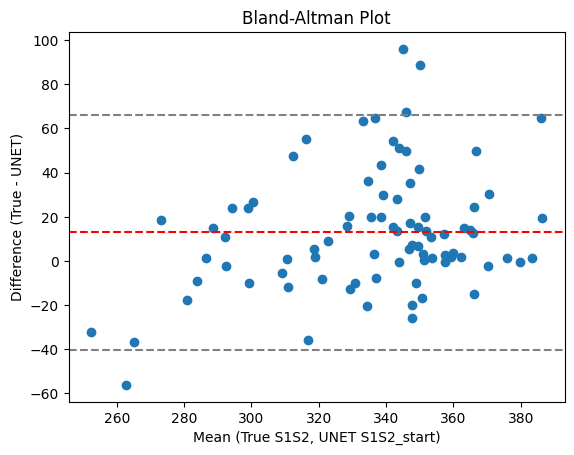

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mean_S1S2 = (df_S1S2["True S1S2"] + df_S1S2["UNET S1S2_start"]) / 2
diff_S1S2 = df_S1S2["True S1S2"] - df_S1S2["UNET S1S2_start"]
mean_diff = np.mean(diff_S1S2)
std_diff = np.std(diff_S1S2)

plt.scatter(mean_S1S2, diff_S1S2)
plt.axhline(mean_diff, color='red', linestyle='--')
plt.axhline(mean_diff + 1.96 * std_diff, color='gray', linestyle='--')
plt.axhline(mean_diff - 1.96 * std_diff, color='gray', linestyle='--')
plt.xlabel("Mean (True S1S2, UNET S1S2_start)")
plt.ylabel("Difference (True - UNET)")
plt.title("Bland-Altman Plot")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(df_S1S2["True S1S2"], df_S1S2["UNET S1S2_start"])
rmse = np.sqrt(mean_squared_error(df_S1S2["True S1S2"], df_S1S2["UNET S1S2_start"]))

print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 21.680599697306793, RMSE: 30.13570202339756


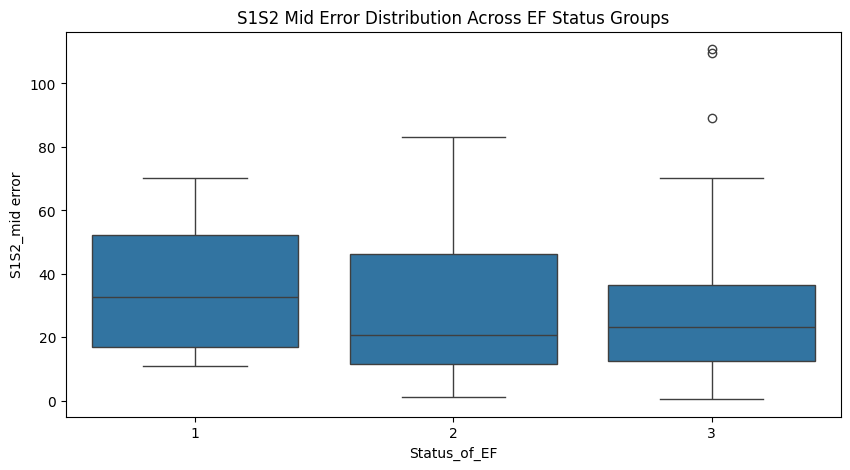

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x="Status_of_EF", y="S1S2_sa error", data=df_S1S2)
plt.title("S1S2 Mid Error Distribution Across EF Status Groups")
plt.show()

In [ ]:
from scipy.stats import f_oneway

groups = [df_S1S2[df_S1S2["Status_of_EF"] == ef]["S1S2_mid error"] for ef in df_S1S2["Status_of_EF"].unique()]
stat, p = f_oneway(*groups)
print(f"ANOVA p-value: {p}")

ANOVA p-value: 0.7773946447416531


In [ ]:
from scipy.stats import spearmanr

corr, p = spearmanr(df_S1S2["Status_of_EF"], df_S1S2["UNET S1S2_mid"])
print(f"Spearman Correlation for S1S2_mid vs EF Status: {corr}, p-value: {p}")

Spearman Correlation for S1S2_mid vs EF Status: 0.2052780006091892, p-value: 0.06103866297093939
